In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('retail_store_sales.csv')

EDA and Data Cleaning

In [43]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [44]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [46]:
df.isna().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [47]:
df.isna().mean() * 100 

Transaction ID       0.000000
Customer ID          0.000000
Category             0.000000
Item                 9.646123
Price Per Unit       4.842942
Quantity             4.803181
Total Spent          4.803181
Payment Method       0.000000
Location             0.000000
Transaction Date     0.000000
Discount Applied    33.391650
dtype: float64

<Axes: >

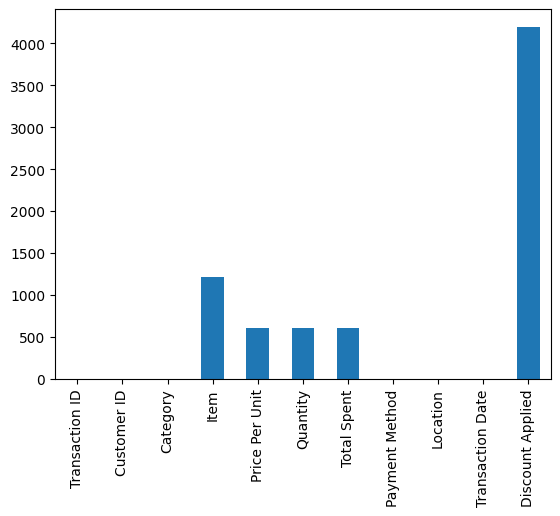

In [48]:
df.isna().sum().plot(kind='bar')

In [49]:
df.isna().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [50]:
mask_total = df['Total Spent'].isna() & df['Price Per Unit'].notna() & df['Quantity'].notna()
df.loc[mask_total, 'Total Spent'] = df.loc[mask_total, 'Price Per Unit'] * df.loc[mask_total, 'Quantity']


mask_price = df['Price Per Unit'].isna() & df['Total Spent'].notna() & df['Quantity'].notna()
df.loc[mask_price, 'Price Per Unit'] = df.loc[mask_price, 'Total Spent'] / df.loc[mask_price, 'Quantity']

mask_quantity = df['Quantity'].isna() & df['Total Spent'].notna() & df['Price Per Unit'].notna()
df.loc[mask_quantity, 'Quantity'] = df.loc[mask_quantity, 'Total Spent'] / df.loc[mask_quantity, 'Price Per Unit']

df['Price Per Unit'] = df.groupby('Category')['Price Per Unit'].transform(lambda x: x.fillna(x.mean()))
df['Quantity'] = df.groupby('Category')['Quantity'].transform(lambda x: x.fillna(x.mean()))
df['Total Spent'] = df.groupby('Category')['Total Spent'].transform(lambda x: x.fillna(x.mean()))

In [51]:
df.isna().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit         0
Quantity               0
Total Spent            0
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [52]:
df['Item'] = df['Item'].fillna('Unknown_Item')
df['Discount Applied'] = df['Discount Applied'].fillna(False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6604\2448219597.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Discount Applied'] = df['Discount Applied'].fillna(False)


In [53]:
df.isna().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

KPIs and Plots

In [54]:
total_revenue = df['Total Spent'].sum()
avg_order_value = df['Total Spent'].mean()
total_transactions = df.shape[0]
discount_usage_rate = (df['Discount Applied'] == 'TRUE').mean() * 100

print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Average Order Value (AOV): ₹{avg_order_value:,.2f}")
print(f"Total Transactions: {total_transactions}")
print(f"Discount Usage Rate: {discount_usage_rate:.2f}%")



Total Revenue: ₹1,630,354.09
Average Order Value (AOV): ₹129.65
Total Transactions: 12575
Discount Usage Rate: 0.00%


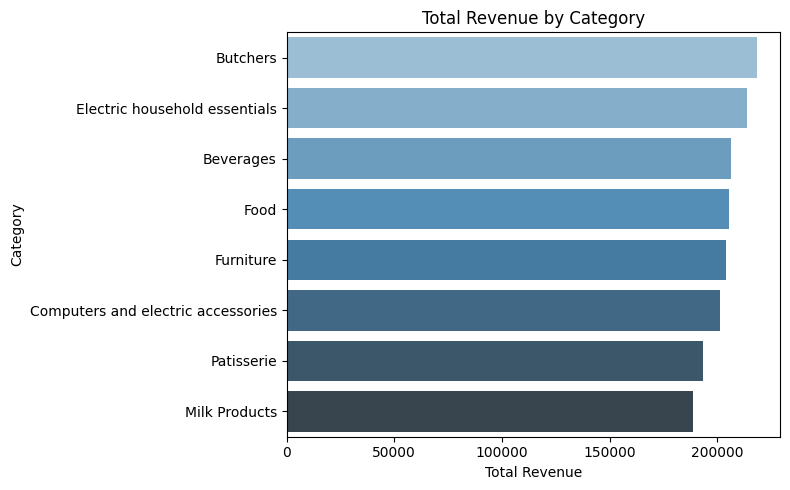

In [55]:
category_sales = df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x='Total Spent', y='Category', hue='Category', palette='Blues_d', legend=False)
plt.title("Total Revenue by Category")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

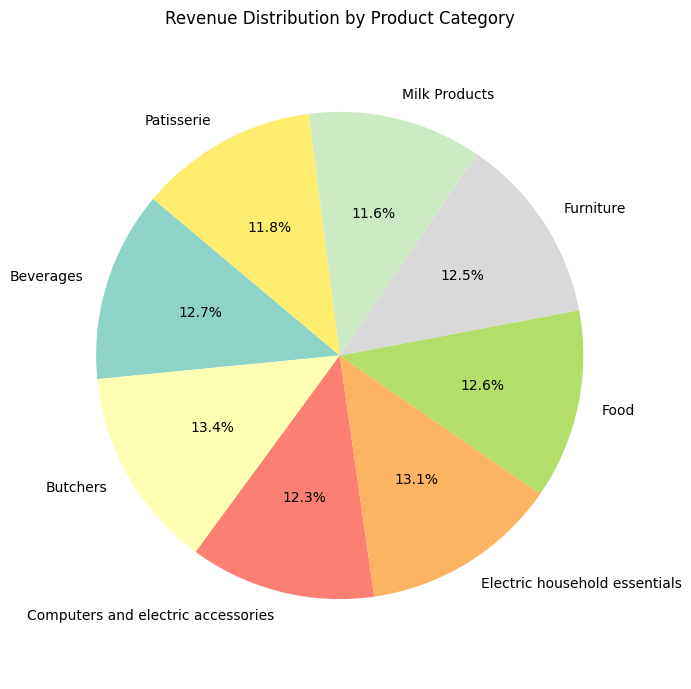

In [63]:
category_revenue = df.groupby('Category')['Total Spent'].sum()

plt.figure(figsize=(7, 7))
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Revenue Distribution by Product Category')
plt.ylabel('')
plt.axis('equal')  
plt.tight_layout()
plt.show()




In [57]:
print(df.groupby('Category')['Total Spent'].sum())

Category
Beverages                             206399.353275
Butchers                              218134.374332
Computers and electric accessories    201150.247123
Electric household essentials         213896.621702
Food                                  205282.983411
Furniture                             203762.760656
Milk Products                         188564.050231
Patisserie                            193163.694656
Name: Total Spent, dtype: float64


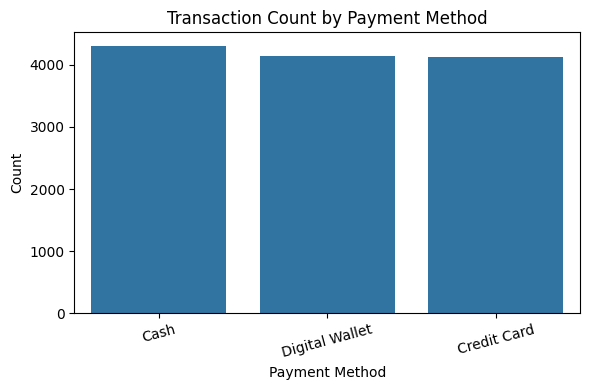

In [58]:
payment_counts = df['Payment Method'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title("Transaction Count by Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

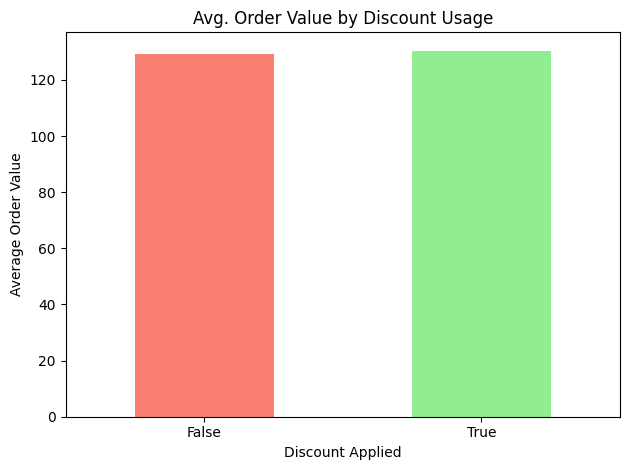

In [59]:
aov_discount = df.groupby('Discount Applied')['Total Spent'].mean()

aov_discount.plot(kind='bar', title='Avg. Order Value by Discount Usage', color=['salmon', 'lightgreen'])
plt.ylabel("Average Order Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

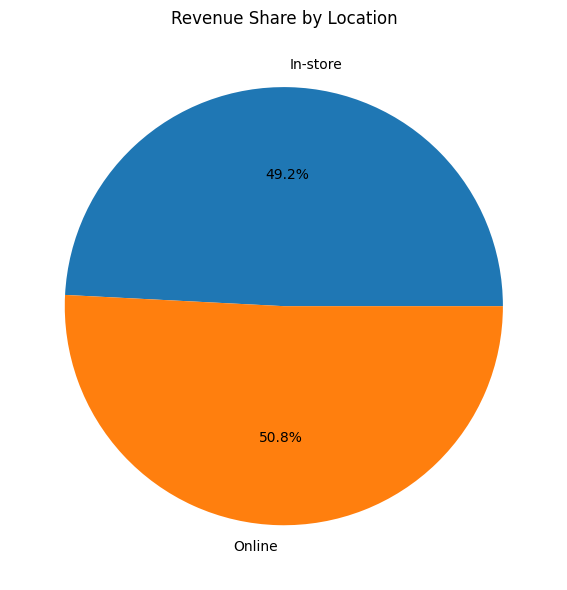

In [60]:
location_sales = df.groupby('Location')['Total Spent'].sum()

location_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Revenue Share by Location')
plt.ylabel('')
plt.tight_layout()
plt.show()

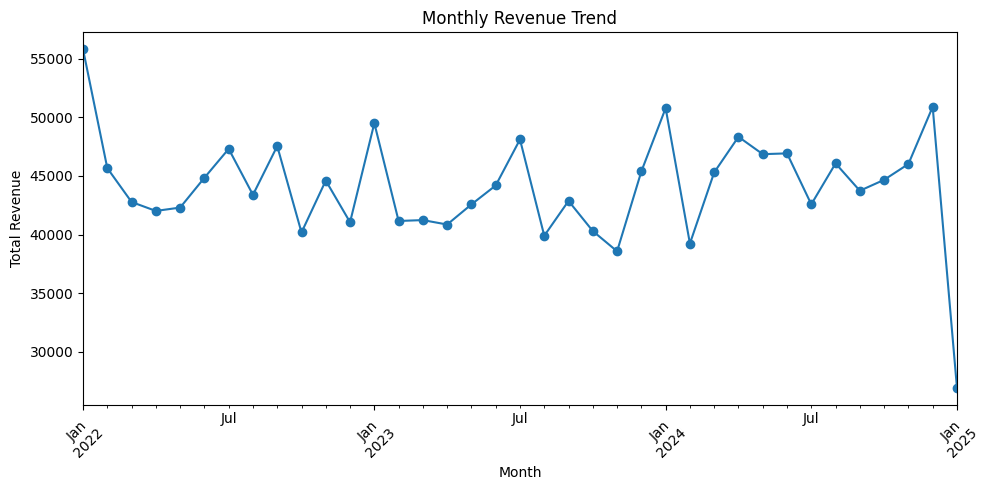

In [65]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
monthly_sales = df.groupby(df['Transaction Date'].dt.to_period('M'))['Total Spent'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(10,5), title="Monthly Revenue Trend")
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6604\366890805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_quantity.values, y=category_quantity.index, palette='crest')


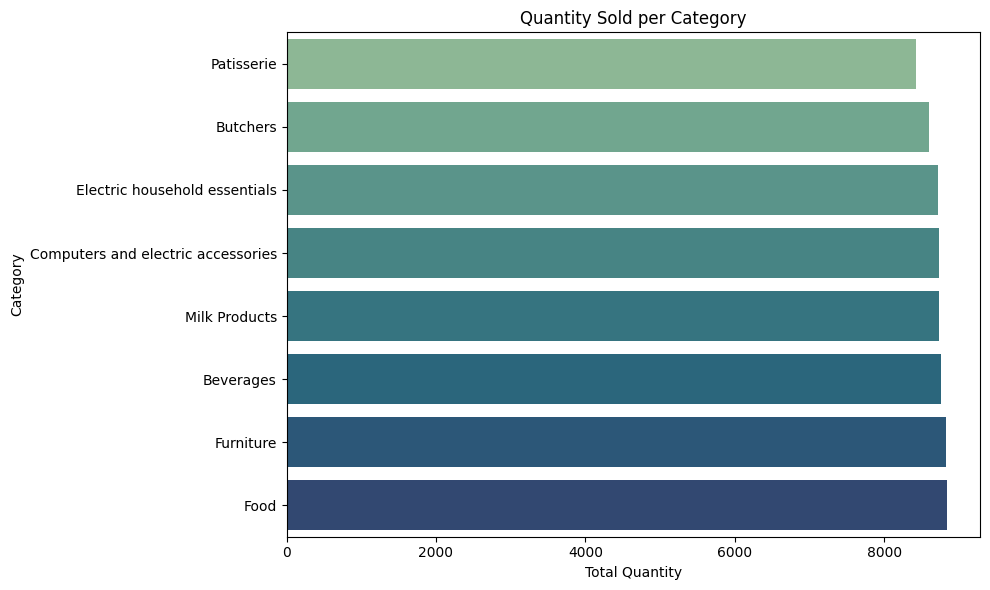

In [67]:
category_quantity = df.groupby('Category')['Quantity'].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=category_quantity.values, y=category_quantity.index, palette='crest')
plt.title("Quantity Sold per Category")
plt.xlabel("Total Quantity")
plt.ylabel("Category")
plt.tight_layout()
plt.show()